In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
training_data = np.load(f'../fashion_train.npy')
test_data = np.load(f'../fashion_test.npy')

In [3]:
df_train = pd.DataFrame(training_data)
df_test = pd.DataFrame(test_data)

In [4]:
X_train = df_train.iloc[:, :-1]  # All columns except the last one are features
y_train = df_train.iloc[:, -1]   # The last column is the label

X_test = df_test.iloc[:, :-1]  # All columns except the last one are features
y_test = df_test.iloc[:, -1]   # The last column is the label

In [5]:


clf_Tree = DecisionTreeClassifier(random_state=42)

clf_Tree.fit(X_train,y_train)


y_pred_best = clf_Tree.predict(X_test)

KeyboardInterrupt: 

In [10]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Decision Tree Accuracy:", accuracy_best)

# Compute confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("Best Model Confusion Matrix:")
print(cm_best)

Best Decision Tree Accuracy: 0.7682
Best Model Confusion Matrix:
[[740   7  21  55 177]
 [ 15 933   5  33  14]
 [ 27   4 754  22 193]
 [ 48  31  19 825  77]
 [167  12 172  60 589]]


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


num_samples = X_train.shape[0]
# MLPClassifier configuration with improvements
mlp = MLPClassifier(
    hidden_layer_sizes=(16,),  # Two hidden layers with more neurons
    activation='relu',           # Relu as a substitute for leaky_relu
    solver='sgd',                # Stochastic Gradient Descent
    learning_rate_init=0.01,    # Reduced learning rate
    max_iter=10000,              # Number of iterations
    batch_size=num_samples,              # Mini-batch gradient descent
    momentum=0,                # Enable momentum
    random_state=42              # Ensures reproducibility
)


# Training
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8272
Confusion Matrix:
[[799   2  18  62 119]
 [  8 942  12  33   5]
 [ 24   2 855  20  99]
 [ 34  10  15 897  44]
 [159   1 154  43 643]]


In [27]:
clf_Knn = KNeighborsClassifier(n_neighbors=10)
clf_Knn.fit(X_train, y_train);

In [24]:
# Make predictions on the test set
y_pred_best = clf_Knn.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Decision Tree Accuracy:", accuracy_best)

# Compute confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
print("Best Model Confusion Matrix:")
print(cm_best)

Best Decision Tree Accuracy: 0.825
Best Model Confusion Matrix:
[[857   2  25  22  94]
 [ 11 950  12  21   6]
 [ 15   1 866  14 104]
 [ 50   5  19 882  44]
 [203   0 194  33 570]]


In [2]:
import numpy as np
training_data = np.load(f'../fashion_train.npy')
test_data = np.load(f'../fashion_test.npy')

labels = training_data[:, -1]
training_data = training_data[:,:-1] / 255 # Normalise pixel values
training_data = np.c_[training_data, labels] # Add labels back

labels = test_data[:, -1]
test_data = test_data[:,:-1] / 255 # Normalise pixel values
test_data = np.c_[test_data, labels] # Add labels back

x_train = training_data[:, :-1]
y_train = training_data[:, -1]

x_test = test_data[:, :-1]
y_test = test_data[:, -1]


import tensorflow as tf
from tensorflow.keras import layers, models

# Update input_shape to match your 28x28 grayscale images
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(5, activation='softmax')  # Update if using more or fewer classes
])

# Ensure the input data is reshaped and normalized
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# First phase: Train with batch size 100 for 100 epochs
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

# Second phase: Train with full batch for another 100 epochs
model.fit(x_train, y_train, epochs=100, batch_size=x_train.shape[0], validation_data=(x_test, y_test))



Epoch 1/100


c:\Users\gitli\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2048 - loss: 1.6097 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2002 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2035 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1995 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2045 - loss: 1.6093 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2063 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2103 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2000 - loss: 1.6094 - val_accuracy

KeyboardInterrupt: 

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (10).

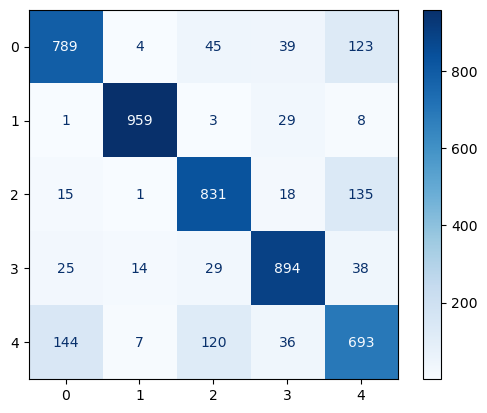

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred_probs = model.predict(x_test)  # Get probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print the confusion matrix for reference
print("Confusion Matrix:")
print(cm)


In [13]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("TensorFlow version:", tf.__version__)
print("Available devices:")
print(device_lib.list_local_devices())
print("GPUs available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
Available devices:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11729807179284031515
xla_global_id: -1
]
GPUs available: []


In [10]:
import tensorflow as tf
try:
    tf.debugging.set_log_device_placement(True)
    tf.constant([[1.0]], dtype=tf.float32).gpu()
    print("GPU operations are enabled!")
except RuntimeError as e:
    print("Error:", e)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Error: GPU:0 unknown device.


In [12]:
import torch
print("PyTorch GPU available:", torch.cuda.is_available())


PyTorch GPU available: False
